<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/6_Regresi%C3%B3n_Lineal__Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Actividad 1: María Fernanda Robles Soto A01736552

## Parte 1:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Cargar archivo csv desde seaborn
df_original = pd.read_csv("/content/listings.csv", on_bad_lines='skip', engine='python')

### Limpieza de los datos y exploración inicial

In [ ]:
# Creamos una copia de la base de datos original para hacer la limpieza de los datos
df = df_original.copy()

# Se estandarizan nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Limpiar y convertir columnas
for col in df.columns:
    if df[col].dtype == 'object':
        # Convertir porcentajes a float
        pct_mask = df[col].astype(str).str.endswith('%')
        if pct_mask.sum() / len(df[col]) > 0.1:
            df[col] = (
                df[col].str.replace('%', '', regex=False)
                        .replace('', np.nan)
                        .astype(float) / 100
            )
        else:
            # Convertir booleanos 't'/'f' a 1/0
            if df[col].isin(['t', 'f']).all():
                df[col] = df[col].map({'t': 1, 'f': 0})
            else:
                # Convertir números con símbolos a float
                df[col] = (
                    df[col].str.replace('$', '', regex=False)
                            .str.replace(',', '', regex=False)
                            .replace('', np.nan)
                )
                # Intentar convertir a float si es posible
                try:
                    df[col] = df[col].astype(float)
                except:
                    pass  # deja como object si no se puede

# Separar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Se hace la imputación de nulos
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    if not df[col].mode().empty:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Tratamiento de outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    if IQR > 0:
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
df

/tmp/ipython-input-47962871.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-47962871.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.787800e+04,https://www.airbnb.com/rooms/17878,2.025062e+13,2025-06-28,city scrape,Very Nice 2Br in Copacabana w. balcony fast WiFi,Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997.0,...,4.91,4.78,4.67,NaN,0,1.0,1.0,0.0,0.0,1.86
1,2.502600e+04,https://www.airbnb.com/rooms/25026,2.025062e+13,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,**Fully renovated in Dec 2022 new kitchen new...,Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840.0,...,4.93,4.85,4.65,NaN,0,1.0,1.0,0.0,0.0,1.71
2,3.576400e+04,https://www.airbnb.com/rooms/35764,2.025062e+13,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691.0,...,4.95,4.95,4.89,NaN,0,1.0,1.0,0.0,0.0,2.88
3,4.830500e+04,https://www.airbnb.com/rooms/48305,2.025062e+13,2025-06-26,city scrape,Bright 6bed Penthouse Seconds from Beach,Enter Bossa Nova's history by staying in the v...,Enter Bossa Nova history by staying in the ver...,https://a0.muscache.com/pictures/miso/Hosting-...,70933.0,...,4.84,4.95,4.59,NaN,1,6.0,5.0,1.0,0.0,1.05
4,4.890100e+04,https://www.airbnb.com/rooms/48901,2.025062e+13,2025-07-01,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,LARGE Beach side 4 bedrooms 2 Complete bathro...,Plenty of shops entertainment andrestaurants<b...,https://a0.muscache.com/pictures/hosting/Hosti...,222884.0,...,4.83,4.94,4.60,NaN,0,1.0,1.0,0.0,0.0,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42567,1.450109e+18,https://www.airbnb.com/rooms/1450108622211032237,2.025062e+13,2025-06-28,city scrape,Aconchego Constante,Overlooking the sea Aconchego Constante is an ...,Copacabana is located in Rio de Janeiro's stun...,https://a0.muscache.com/pictures/miso/Hosting-...,703072927.0,...,5.00,4.96,4.83,NaN,1,1.0,1.0,0.0,0.0,0.78
42568,1.450109e+18,https://www.airbnb.com/rooms/1450108828266063076,2.025062e+13,2025-06-26,city scrape,Quarto casal,Premium and cozy location.,Copacabana is located in Rio de Janeiro's stun...,https://a0.muscache.com/pictures/hosting/Hosti...,320682549.0,...,5.00,4.96,4.83,NaN,0,1.0,0.0,1.0,0.0,0.78
42569,1.450124e+18,https://www.airbnb.com/rooms/1450124185987579534,2.025062e+13,2025-06-30,city scrape,Cama em Dorm Misto (9) com AC,Single bed in a mixed room with nine beds loca...,Copacabana is located in Rio de Janeiro's stun...,https://a0.muscache.com/pictures/hosting/Hosti...,37776540.0,...,5.00,4.96,4.83,NaN,1,8.0,0.0,2.5,0.0,0.78
42570,1.450124e+18,https://www.airbnb.com/rooms/1450124362124784419,2.025062e+13,2025-06-26,city scrape,Quarto para casal,Great location and cozy room to enjoy your trip.,Copacabana is located in Rio de Janeiro's stun...,https://a0.muscache.com/pictures/hosting/Hosti...,378959794.0,...,5.00,4.96,4.83,NaN,0,1.0,0.0,1.0,0.0,0.78


### REGRESIÓN LINEAL SIMPLE

#### Correlación existente por cada tipo de habitación

In [ ]:
# Recuento de valores por tipo de habitación
df["room_type"].value_counts()

,count
room_type,
Entire home/apt,33990
Private room,8152
Shared room,407
Hotel room,23


In [ ]:
Entire_home_apt = df[df["room_type"] == "Entire home/apt"]
Private_room = df[df["room_type"] == "Private room"]
Shared_room = df[df["room_type"] == "Shared room"]
Hotel_room = df[df["room_type"] == "Hotel room"]

Corr_Entire_home_apt = Entire_home_apt.corr(numeric_only=True).abs()
Corr_Private_room = Private_room.corr(numeric_only=True).abs()
Corr_Shared_room = Shared_room.corr(numeric_only=True).abs()
Corr_Hotel_room = Hotel_room.corr(numeric_only=True).abs()

In [ ]:
# Hacemos el análsis de correlación
# HOST_ACCEPTANCE_RATE y HOST_RESPONSE_RATE

correlaciones1 = {
    "Entire_home_apt": Entire_home_apt["host_acceptance_rate"].corr(Entire_home_apt["host_response_rate"]),
    "Private_room": Private_room["host_acceptance_rate"].corr(Private_room["host_response_rate"]),
    "Shared_room": Shared_room["host_acceptance_rate"].corr(Shared_room["host_response_rate"]),
    "Hotel_room": Hotel_room["host_acceptance_rate"].corr(Hotel_room["host_response_rate"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones1, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.460844
Private_room        0.420151
Shared_room         0.296713
Hotel_room         -0.015398


In [ ]:
#HOST_ACCEPTANCE_RATE Y PRICE

correlaciones2 = {
    "Entire_home_apt": Entire_home_apt["host_acceptance_rate"].corr(Entire_home_apt["price"]),
    "Private_room": Private_room["host_acceptance_rate"].corr(Private_room["price"]),
    "Shared_room": Shared_room["host_acceptance_rate"].corr(Shared_room["price"]),
    "Hotel_room": Hotel_room["host_acceptance_rate"].corr(Hotel_room["price"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones2, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt    -0.152765
Private_room        0.019210
Shared_room        -0.116358
Hotel_room         -0.442452


In [ ]:
#HOST_ACCEPTANCE_RATE Y NUMBER_OF_REVIEWS

correlaciones3 = {
    "Entire_home_apt": Entire_home_apt["number_of_reviews"].corr(Entire_home_apt["host_response_rate"]),
    "Private_room": Private_room["number_of_reviews"].corr(Private_room["host_response_rate"]),
    "Shared_room": Shared_room["number_of_reviews"].corr(Shared_room["host_response_rate"]),
    "Hotel_room": Hotel_room["number_of_reviews"].corr(Hotel_room["host_response_rate"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones3, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt     0.178520
Private_room        0.113685
Shared_room         0.082269
Hotel_room         -0.618158


In [ ]:
#REVIEW_SCORES_RATING Y CALCULATED_HOST_LISTINGS_COUNT

correlaciones4 = {
    "Entire_home_apt": Entire_home_apt["review_scores_rating"].corr(Entire_home_apt["calculated_host_listings_count"]),
    "Private_room": Private_room["review_scores_rating"].corr(Private_room["calculated_host_listings_count"]),
    "Shared_room": Shared_room["review_scores_rating"].corr(Shared_room["calculated_host_listings_count"]),
    "Hotel_room": Hotel_room["review_scores_rating"].corr(Hotel_room["calculated_host_listings_count"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones4, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt    -0.171162
Private_room       -0.181270
Shared_room        -0.011632
Hotel_room          0.136616


In [ ]:
#REVIEWS_PER_MONTH Y REVIEW_SCORES_COMMUNICATION

correlaciones6 = {
    "Entire_home_apt": Entire_home_apt["reviews_per_month"].corr(Entire_home_apt["review_scores_communication"]),
    "Private_room": Private_room["reviews_per_month"].corr(Private_room["review_scores_communication"]),
    "Shared_room": Shared_room["reviews_per_month"].corr(Shared_room["review_scores_communication"]),
    "Hotel_room": Hotel_room["reviews_per_month"].corr(Hotel_room["review_scores_communication"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones6, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt    -0.100496
Private_room       -0.064008
Shared_room        -0.093410
Hotel_room         -0.400261


In [ ]:
#AVAILABILITY_365 Y NUMBER_OF_REVIEWS

correlaciones5 = {
    "Entire_home_apt": Entire_home_apt["availability_365"].corr(Entire_home_apt["number_of_reviews"]),
    "Private_room": Private_room["availability_365"].corr(Private_room["number_of_reviews"]),
    "Shared_room": Shared_room["availability_365"].corr(Shared_room["number_of_reviews"]),
    "Hotel_room": Hotel_room["availability_365"].corr(Hotel_room["number_of_reviews"])
}

tabla_corr = pd.DataFrame.from_dict(correlaciones5, orient="index", columns=["Correlación"])
print(tabla_corr)

                 Correlación
Entire_home_apt    -0.153448
Private_room       -0.139779
Shared_room        -0.168357
Hotel_room         -0.155292


#### Tabla de las 10 variables con mayor correlación

In [ ]:
#Calculamos la correlación entre las variables en general de manera automatica
subsets = {
    "Entire_home_apt": Entire_home_apt,
    "Private_room": Private_room,
    "Shared_room": Shared_room,
    "Hotel_room": Hotel_room
}

def top10_corr(df):
# Columnas numéricas únicamente
    num = df.select_dtypes(include=[np.number])
    if num.shape[1] < 2:
        return pd.DataFrame(columns=["Variable_1","Variable_2","Abs_Correlación"])

    corr = num.corr(method="pearson")
    corr_abs = corr.abs()

# Se eliminan los duplicados y la diagonal oara evitar correlaciones entre la misma variable
    mask = np.triu(np.ones_like(corr_abs, dtype=bool))
    corr_pairs = corr_abs.mask(mask).stack().sort_values(ascending=False)

# Toma las 10 más altas
    top10 = corr_pairs.head(20).reset_index()
    top10.columns = ["Variable_1", "Variable_2", "Abs_Correlación"]
    return top10

# Mostrar las tablas para cada subset
top10_dict = {}
for name, sub in subsets.items():
    print("\n" + "="*80)
    print(f"Top 10 correlaciones absolutas - {name}")
    print("="*80)
    top10 = top10_corr(sub)
    top10_dict[name] = top10
    display(top10)


Top 10 correlaciones absolutas - Entire_home_apt


,Variable_1,Variable_2,Abs_Correlación
0,calculated_host_listings_count_entire_homes,calculated_host_listings_count,0.983344
1,estimated_occupancy_l365d,number_of_reviews_ltm,0.975514
2,maximum_nights_avg_ntm,minimum_maximum_nights,0.973758
3,availability_90,availability_60,0.966237
4,host_total_listings_count,host_listings_count,0.964761
5,maximum_nights_avg_ntm,maximum_maximum_nights,0.961326
6,calculated_host_listings_count,host_listings_count,0.945309
7,availability_60,availability_30,0.933895
8,calculated_host_listings_count_entire_homes,host_listings_count,0.929930
9,calculated_host_listings_count,host_total_listings_count,0.914379



Top 10 correlaciones absolutas - Private_room


,Variable_1,Variable_2,Abs_Correlación
0,maximum_nights_avg_ntm,minimum_maximum_nights,0.990159
1,maximum_nights_avg_ntm,maximum_maximum_nights,0.987842
2,availability_90,availability_60,0.981740
3,estimated_occupancy_l365d,number_of_reviews_ltm,0.978831
4,maximum_maximum_nights,minimum_maximum_nights,0.969066
5,minimum_nights_avg_ntm,minimum_nights,0.964089
6,availability_60,availability_30,0.958613
7,minimum_nights_avg_ntm,minimum_minimum_nights,0.957910
8,minimum_minimum_nights,minimum_nights,0.946318
9,calculated_host_listings_count,host_listings_count,0.933732



Top 10 correlaciones absolutas - Shared_room


,Variable_1,Variable_2,Abs_Correlación
0,estimated_occupancy_l365d,number_of_reviews_ltm,0.997085
1,maximum_nights_avg_ntm,minimum_maximum_nights,0.989649
2,minimum_nights_avg_ntm,minimum_minimum_nights,0.989567
3,maximum_nights_avg_ntm,maximum_maximum_nights,0.983875
4,minimum_nights_avg_ntm,minimum_nights,0.982662
5,minimum_minimum_nights,minimum_nights,0.980849
6,calculated_host_listings_count,host_listings_count,0.978987
7,availability_90,availability_60,0.977953
8,maximum_maximum_nights,minimum_maximum_nights,0.950028
9,availability_60,availability_30,0.946034



Top 10 correlaciones absolutas - Hotel_room


,Variable_1,Variable_2,Abs_Correlación
0,minimum_minimum_nights,minimum_nights,1.000000
1,estimated_occupancy_l365d,number_of_reviews_ltm,1.000000
2,availability_90,availability_60,0.988596
3,host_total_listings_count,host_listings_count,0.969601
4,maximum_nights_avg_ntm,maximum_maximum_nights,0.967864
5,maximum_nights_avg_ntm,minimum_maximum_nights,0.967314
6,availability_eoy,availability_90,0.962778
7,calculated_host_listings_count,host_listings_count,0.957568
8,availability_60,availability_30,0.955106
9,availability_eoy,availability_60,0.938538


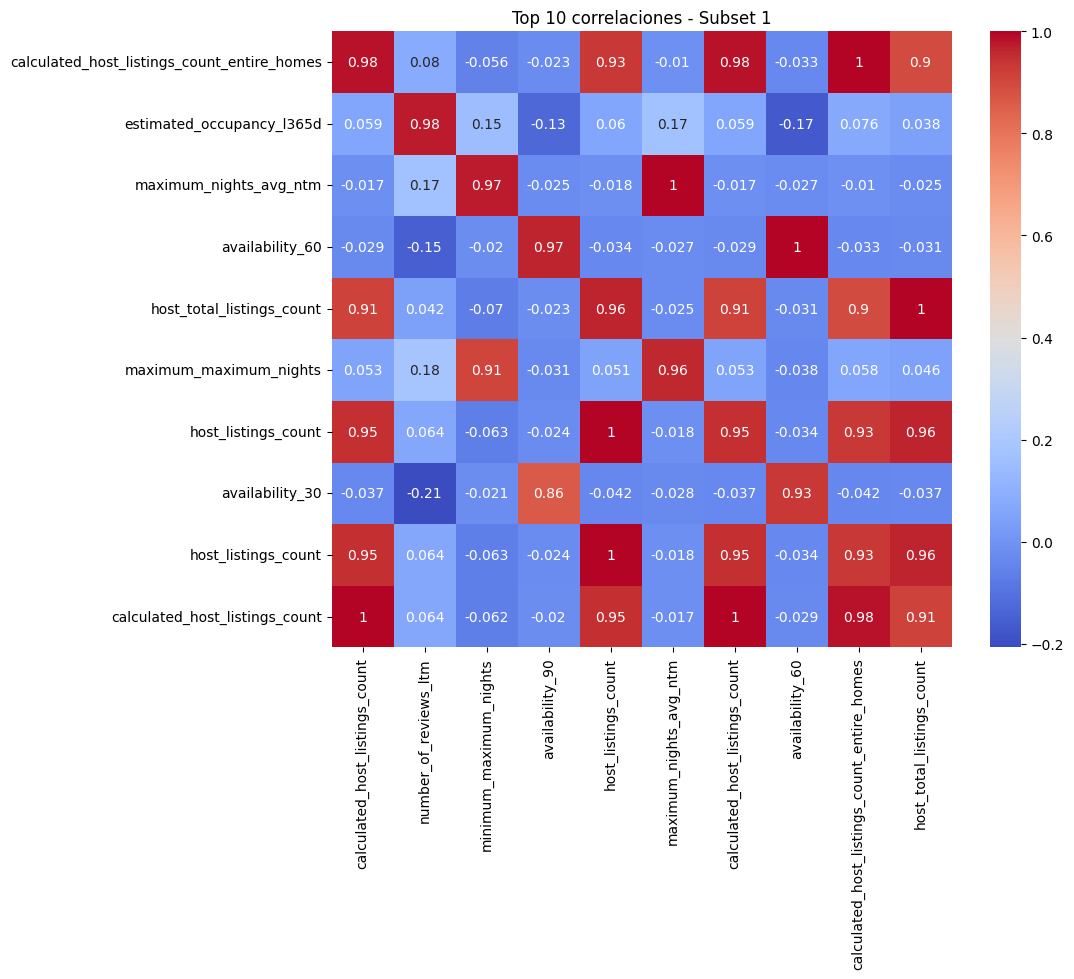

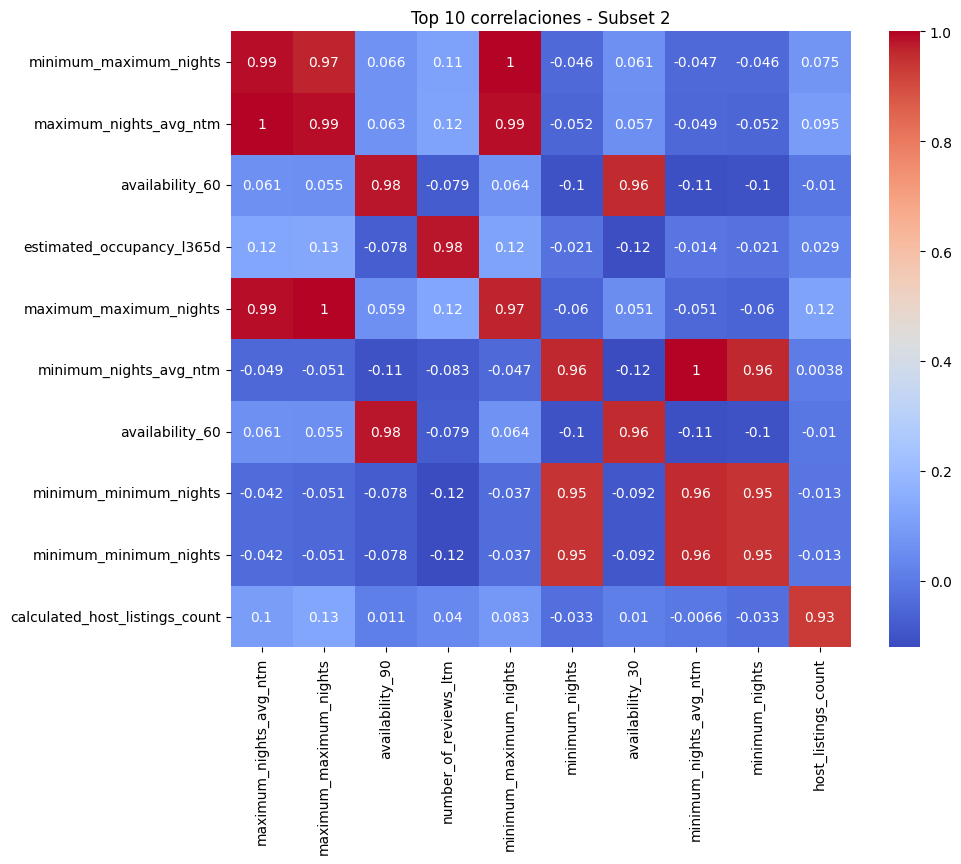

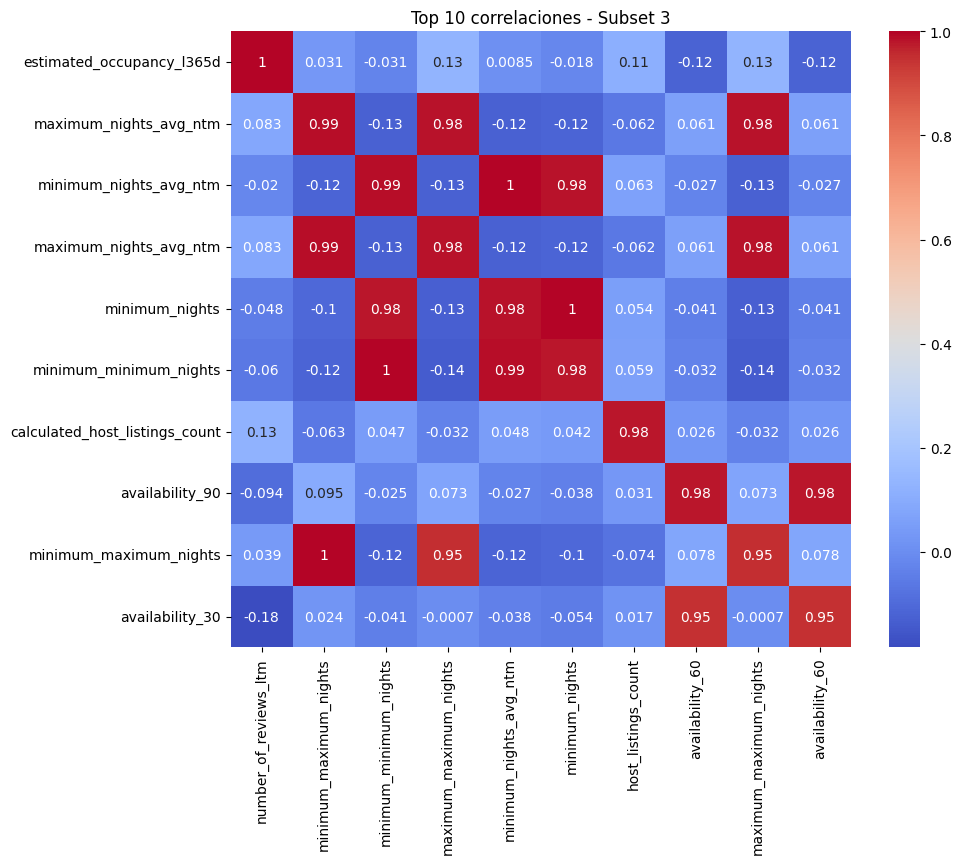

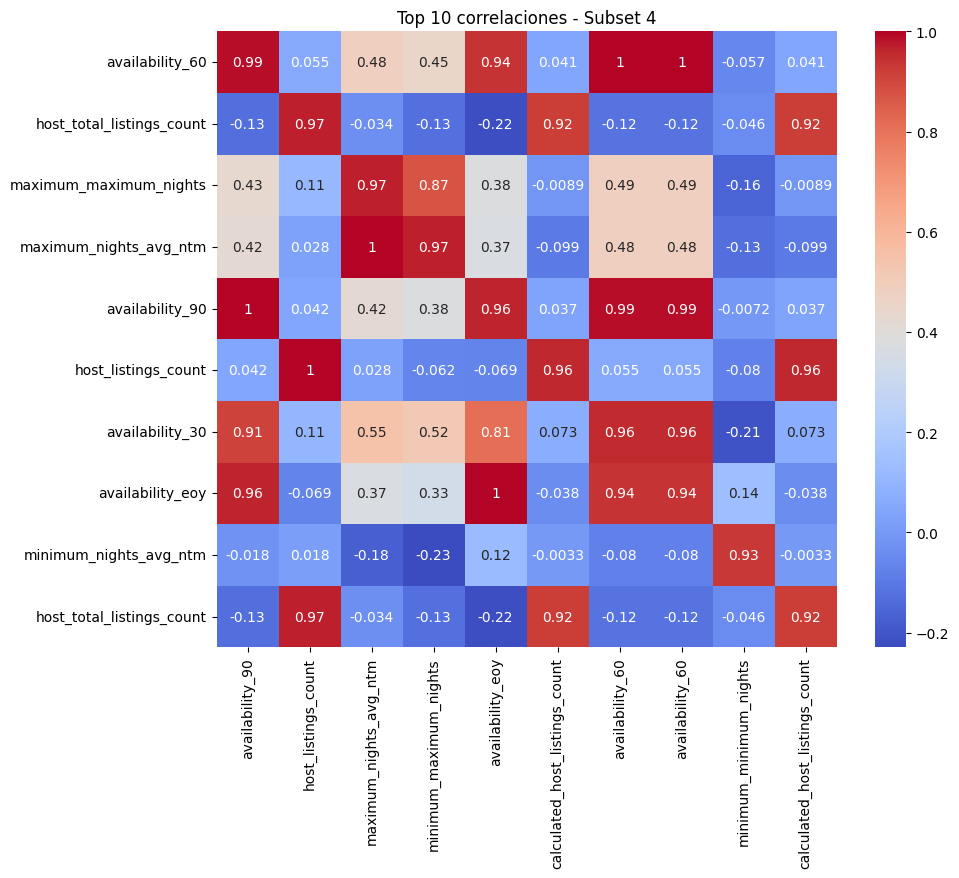

In [ ]:
for i, subset in enumerate([Entire_home_apt, Private_room, Shared_room, Hotel_room], start=1):
    plt.figure(figsize=(10,8))
    corr = subset.corr(numeric_only=True)
    top_vars = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[1:11].index
    sns.heatmap(corr.loc[top_vars.get_level_values(0), top_vars.get_level_values(1)], annot=True, cmap="coolwarm")
    plt.title(f"Top 10 correlaciones - Subset {i}")
    plt.show()

## Parte 2

### Regresión Multiple

#### Modelo de regression lineal multiple para cada variable cuantitativa

In [ ]:
# Review_scores_rating

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df["review_scores_rating"]).sort_values(ascending=False)

print(corr_review)

review_scores_rating                            1.000000
review_scores_accuracy                          0.773660
review_scores_value                             0.724238
review_scores_cleanliness                       0.711896
review_scores_communication                     0.642535
review_scores_checkin                           0.601993
review_scores_location                          0.400439
id                                              0.150113
price                                           0.107588
bathrooms                                       0.047690
host_id                                         0.045103
minimum_nights                                  0.042272
minimum_minimum_nights                          0.039092
bedrooms                                        0.034166
latitude                                        0.023286
minimum_nights_avg_ntm                          0.016831
host_response_rate                              0.012915
availability_30                

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Declaramos las variables independientes y dependiente
Vars_Indep = df[['review_scores_accuracy', 'review_scores_value','review_scores_cleanliness']]
Var_Dep = df['review_scores_rating']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.42777344 0.21794589 0.22574528]
Intercepto: 0.6455669176948255
Coeficiente de determinación: 0.7091273884500802
Coeficiente de correlación: 0.842097018430822
Modelo matemático:
review_scores_rating = 0.6456 + 0.4278*review_scores_accuracy + 0.2179*review_scores_value + 0.2257*review_scores_cleanliness


In [ ]:
# host_acceptance_rate

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df["host_acceptance_rate"]).sort_values(ascending=False)

print(corr_review)

host_acceptance_rate                            1.000000
host_response_rate                              0.451985
number_of_reviews_ltm                           0.345238
estimated_occupancy_l365d                       0.341694
reviews_per_month                               0.325249
estimated_revenue_l365d                         0.303958
number_of_reviews                               0.295711
number_of_reviews_ly                            0.292374
number_of_reviews_l30d                          0.274799
maximum_maximum_nights                          0.129499
maximum_minimum_nights                          0.114082
maximum_nights_avg_ntm                          0.112367
minimum_maximum_nights                          0.093216
calculated_host_listings_count_entire_homes     0.061698
calculated_host_listings_count                  0.040450
host_listings_count                             0.037658
id                                              0.020604
host_total_listings_count      

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['host_response_rate', 'number_of_reviews_ltm','estimated_occupancy_l365d']]
Var_Dep = df['host_acceptance_rate']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [4.86696760e-01 5.66022349e-03 2.05235889e-04]
Intercepto: 0.29112957584221744
Coeficiente de determinación: 0.2710738894241317
Coeficiente de correlación: 0.5206475673852051
Modelo matemático:
host_acceptance_rate = 0.2911 + 0.4867*host_response_rate + 0.0057*number_of_reviews_ltm + 0.0002*estimated_occupancy_l365d


In [ ]:
# host_is_superhost

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df['host_is_superhost']).sort_values(ascending=False)

print(corr_review)

host_is_superhost                               1.000000
estimated_occupancy_l365d                       0.477187
number_of_reviews_ltm                           0.473778
estimated_revenue_l365d                         0.440413
number_of_reviews_ly                            0.434579
number_of_reviews                               0.423196
reviews_per_month                               0.365300
number_of_reviews_l30d                          0.320083
host_acceptance_rate                            0.293277
host_response_rate                              0.210819
calculated_host_listings_count_entire_homes     0.183438
calculated_host_listings_count                  0.162089
host_listings_count                             0.149948
host_total_listings_count                       0.125617
review_scores_value                             0.115442
review_scores_rating                            0.106439
host_identity_verified                          0.104160
maximum_minimum_nights         

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['estimated_occupancy_l365d', 'number_of_reviews_ltm','estimated_revenue_l365d']]
Var_Dep = df['host_is_superhost']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [1.52049649e-03 7.24322718e-03 3.53901248e-06]
Intercepto: 0.1390872113126133
Coeficiente de determinación: 0.23461362874567226
Coeficiente de correlación: 0.48436931028469615
Modelo matemático:
host_is_superhost = 0.1391 + 0.0015*estimated_occupancy_l365d + 0.0072*number_of_reviews_ltm + 0.0000*estimated_revenue_l365d


In [ ]:
# host_total_listings_count

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df['host_total_listings_count']).sort_values(ascending=False)

print(corr_review)

host_total_listings_count                       1.000000
host_listings_count                             0.959985
calculated_host_listings_count                  0.907140
calculated_host_listings_count_entire_homes     0.840502
instant_bookable                                0.222587
host_identity_verified                          0.151003
maximum_minimum_nights                          0.143784
calculated_host_listings_count_private_rooms    0.139636
host_is_superhost                               0.125617
host_has_profile_pic                            0.120373
accommodates                                    0.107488
longitude                                       0.081360
reviews_per_month                               0.067114
beds                                            0.065023
estimated_revenue_l365d                         0.063695
bathrooms                                       0.063431
maximum_maximum_nights                          0.059666
host_response_rate             

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['host_listings_count', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes']]
Var_Dep = df['host_total_listings_count']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [ 1.46488753 -0.05708612  0.10720052]
Intercepto: -0.19326634786755026
Coeficiente de determinación: 0.9219449973765208
Coeficiente de correlación: 0.96017966932055
Modelo matemático:
host_total_listings_count = -0.1933 + 1.4649*host_listings_count - 0.0571*calculated_host_listings_count + 0.1072*calculated_host_listings_count_entire_homes


In [ ]:
# accommodates

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df['accommodates']).sort_values(ascending=False)

print(corr_review)

accommodates                                    1.000000
bedrooms                                        0.691368
beds                                            0.690658
bathrooms                                       0.544865
price                                           0.456215
calculated_host_listings_count_entire_homes     0.168672
estimated_revenue_l365d                         0.148195
host_total_listings_count                       0.107488
host_listings_count                             0.096153
maximum_minimum_nights                          0.093238
calculated_host_listings_count                  0.079488
minimum_nights_avg_ntm                          0.074848
minimum_nights                                  0.070942
availability_365                                0.069041
minimum_minimum_nights                          0.068506
availability_eoy                                0.060637
maximum_nights                                  0.043988
maximum_maximum_nights         

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['bedrooms', 'beds','bathrooms']]
Var_Dep = df['accommodates']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.94389345 0.60512636 0.20297077]
Intercepto: 0.8491712781277982
Coeficiente de determinación: 0.5918716881649602
Coeficiente de correlación: 0.7693319752648788
Modelo matemático:
accommodates = 0.8492 + 0.9439*bedrooms + 0.6051*beds + 0.2030*bathrooms


In [ ]:
# bedrooms

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df['bedrooms']).sort_values(ascending=False)

print(corr_review)

bedrooms                                        1.000000
accommodates                                    0.691368
bathrooms                                       0.662897
beds                                            0.621291
price                                           0.516821
minimum_minimum_nights                          0.133998
minimum_nights                                  0.133533
minimum_nights_avg_ntm                          0.131613
maximum_minimum_nights                          0.114483
estimated_revenue_l365d                         0.107862
calculated_host_listings_count_entire_homes     0.078518
availability_365                                0.065807
review_scores_location                          0.060037
host_total_listings_count                       0.049061
availability_eoy                                0.040807
review_scores_communication                     0.034583
review_scores_checkin                           0.034480
review_scores_rating           

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['accommodates', 'beds','bathrooms']]
Var_Dep = df['bedrooms']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.15232952 0.10274264 0.42697096]
Intercepto: 0.051278209329793434
Coeficiente de determinación: 0.6087950383965693
Coeficiente de correlación: 0.7802531886487676
Modelo matemático:
bedrooms = 0.0513 + 0.1523*accommodates + 0.1027*beds + 0.4270*bathrooms


In [ ]:
# price

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df['price']).sort_values(ascending=False)

print(corr_review)

price                                           1.000000
bathrooms                                       0.524565
bedrooms                                        0.516821
accommodates                                    0.456215
beds                                            0.377220
minimum_minimum_nights                          0.200363
review_scores_location                          0.194718
minimum_nights                                  0.192219
minimum_nights_avg_ntm                          0.175991
availability_365                                0.151201
review_scores_checkin                           0.136976
review_scores_communication                     0.132961
maximum_minimum_nights                          0.130434
availability_eoy                                0.129184
availability_30                                 0.116498
review_scores_rating                            0.107588
availability_90                                 0.107290
availability_60                

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# price

# Declaramos las variables independientes y dependiente
Vars_Indep = df[['bedrooms', 'accommodates','bathrooms']]
Var_Dep = df['price']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [ 75.50376882  19.63416089 119.79533308]
Intercepto: 53.10234598687293
Coeficiente de determinación: 0.3360275947851551
Coeficiente de correlación: 0.5796788721224494
Modelo matemático:
price = 53.1023 + 75.5038*bedrooms + 19.6342*accommodates + 119.7953*bathrooms


In [ ]:
# review_score_value

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df['review_scores_value']).sort_values(ascending=False)

print(corr_review)

review_scores_value                             1.000000
review_scores_rating                            0.724238
review_scores_accuracy                          0.680055
review_scores_cleanliness                       0.612344
review_scores_communication                     0.523409
review_scores_checkin                           0.490093
review_scores_location                          0.370715
id                                              0.143013
host_is_superhost                               0.115442
reviews_per_month                               0.103900
number_of_reviews_l30d                          0.078634
host_id                                         0.061373
latitude                                        0.036070
number_of_reviews_ltm                           0.029976
estimated_occupancy_l365d                       0.026602
host_response_rate                              0.021540
bathrooms                                       0.021302
estimated_revenue_l365d        

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness']]
Var_Dep = df['review_scores_value']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.56306288 0.36868291 0.14945948]
Intercepto: -0.478204728963604
Coeficiente de determinación: 0.5687698375356742
Coeficiente de correlación: 0.7541683084933192
Modelo matemático:
review_scores_value = -0.4782 + 0.5631*review_scores_rating + 0.3687*review_scores_accuracy + 0.1495*review_scores_cleanliness


In [ ]:
# bathrooms

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df['bathrooms']).sort_values(ascending=False)

print(corr_review)

bathrooms                                       1.000000
bedrooms                                        0.662897
accommodates                                    0.544865
price                                           0.524565
beds                                            0.523355
availability_365                                0.122935
minimum_minimum_nights                          0.121160
minimum_nights                                  0.119282
minimum_nights_avg_ntm                          0.117177
availability_eoy                                0.114746
maximum_minimum_nights                          0.110351
estimated_revenue_l365d                         0.110043
availability_90                                 0.088109
availability_60                                 0.075161
availability_30                                 0.070139
review_scores_location                          0.066172
host_total_listings_count                       0.063431
calculated_host_listings_count_

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['bedrooms', 'accommodates','price']]
Var_Dep = df['bathrooms']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [0.39906093 0.04350349 0.0005866 ]
Intercepto: 0.40399297569493575
Coeficiente de determinación: 0.49216886944978755
Coeficiente de correlación: 0.701547481963828
Modelo matemático:
bathrooms = 0.4040 + 0.3991*bedrooms + 0.0435*accommodates + 0.0006*price


In [ ]:
# reviews_per_month

# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=np.number).columns

# Correlación de review_scores_rating con todas las numéricas
corr_review = df[num_cols].corrwith(df['reviews_per_month']).sort_values(ascending=False)

print(corr_review)

reviews_per_month                               1.000000
number_of_reviews_ltm                           0.807557
estimated_occupancy_l365d                       0.776404
number_of_reviews_l30d                          0.713180
estimated_revenue_l365d                         0.619954
number_of_reviews_ly                            0.601642
number_of_reviews                               0.572462
host_is_superhost                               0.365300
host_acceptance_rate                            0.325249
instant_bookable                                0.209478
id                                              0.201165
host_response_rate                              0.180335
calculated_host_listings_count_entire_homes     0.148155
maximum_maximum_nights                          0.120420
review_scores_value                             0.103900
maximum_nights_avg_ntm                          0.102685
longitude                                       0.096759
host_listings_count            

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [ ]:
# Declaramos las variables independientes y dependiente
Vars_Indep = df[['number_of_reviews_ltm', 'estimated_occupancy_l365d','number_of_reviews_l30d']]
Var_Dep = df['reviews_per_month']

# Definimos el  modelo
model = LinearRegression()
# Ajustamos el modelo con las variables
model.fit(X=Vars_Indep, y=Var_Dep)

# Definimos los coeficientes e intercepto
print("Coeficientes obtenidos:", model.coef_)
print("Intercepto:", model.intercept_)

# Verificamos los coeficientes de determinación
coef_Deter = model.score(X=Vars_Indep, y=Var_Dep)
print("Coeficiente de determinación:", coef_Deter)

# Veroficamos los coeficiente de correlación
coef_Correl = np.sqrt(coef_Deter)
print("Coeficiente de correlación:", coef_Correl)

# Vemos el modelo matemático
modelo_str = f"{Var_Dep.name} = {model.intercept_:.4f}"
for c, v in zip(model.coef_, Vars_Indep.columns):
    signo = "+" if c >= 0 else "-"
    modelo_str += f" {signo} {abs(c):.4f}*{v}"
print("Modelo matemático:")
print(modelo_str)

Coeficientes obtenidos: [ 0.06852936 -0.00300428  0.31616376]
Intercepto: 0.4796484507885932
Coeficiente de determinación: 0.7047014125868905
Coeficiente de correlación: 0.8394649561398561
Modelo matemático:
reviews_per_month = 0.4796 + 0.0685*number_of_reviews_ltm - 0.0030*estimated_occupancy_l365d + 0.3162*number_of_reviews_l30d
